In [1]:
# import dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd                     
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sqlalchemy
from sqlalchemy import create_engine, func
import sqlite3 as sql

In [2]:
# load data
db = sqlalchemy.create_engine('sqlite:///movies.sqlite')
imdb_df = pd.read_sql('select * from cleaned_movies', db)
imdb_df

,field1,title,year,month,genre,duration,country,language,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit
0,4334,Kate & Leopold,2001,3,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,76019048,28019048,115.0,341.0,44.0,0
1,19759,Diritto di cronaca,1981,3,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,40716963,28716963,27.0,115.0,64.0,0
2,19774,Arturo,1981,2,"Comedy, Romance",97,USA,English,7000000,95461682,88461682,44.0,132.0,69.0,0
3,19790,Blow Out,1981,4,"Crime, Drama, Mystery",108,USA,English,18000000,12000000,-6000000,123.0,199.0,86.0,1
4,19804,Libertà poco vigilata,1981,5,"Comedy, Drama",94,USA,English,11000000,31261269,20261269,5.0,16.0,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,84912,Cena con delitto - Knives Out,2019,12,"Comedy, Crime, Drama",130,USA,"English, Spanish, Hindi",40000000,309232797,269232797,448.0,2334.0,82.0,1
3327,85028,Unplanned,2019,3,"Biography, Drama",109,USA,English,6000000,21171090,15171090,34.0,629.0,10.0,0
3328,85176,Non si scherza col fuoco,2019,2,"Comedy, Family",96,USA,"English, Spanish",29900000,68631669,38731669,62.0,219.0,24.0,0
3329,85266,Impractical Jokers: The Movie,2020,2,Comedy,92,USA,English,3000000,10691091,7691091,17.0,152.0,39.0,0


In [4]:
# drop unnecessary columns
imdb_df = imdb_df.drop(columns=['field1', 'country','language'])
imdb_df.head()

,title,year,month,genre,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit
0,Kate & Leopold,2001,3,"Comedy, Fantasy, Romance",118,48000000,76019048,28019048,115.0,341.0,44.0,0
1,Diritto di cronaca,1981,3,"Drama, Romance, Thriller",116,12000000,40716963,28716963,27.0,115.0,64.0,0
2,Arturo,1981,2,"Comedy, Romance",97,7000000,95461682,88461682,44.0,132.0,69.0,0
3,Blow Out,1981,4,"Crime, Drama, Mystery",108,18000000,12000000,-6000000,123.0,199.0,86.0,1
4,Libertà poco vigilata,1981,5,"Comedy, Drama",94,11000000,31261269,20261269,5.0,16.0,55.0,0


<AxesSubplot:>

<Figure size 1800x800 with 0 Axes>

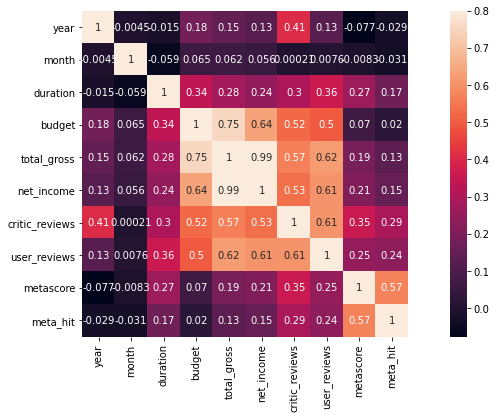

In [5]:
# plot a sns heat map to see what data correlates.
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(15,6))
sns.heatmap(data=imdb_df.corr(),square=True,vmax=0.8,annot=True)

# Critically Acclaimed Movies (Based off of Metascore)

Our group considers a movie to be critically acclaimed (meta_hit) if the movie achieves a metascore of 75 or greater.

### Split data into training and testing

In [6]:
# seperate the features(X) from the target (y)
y = imdb_df['meta_hit']
X = pd.get_dummies(imdb_df.drop(columns='meta_hit'))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.shape

(2498, 3619)

In [7]:
X.describe()

,year,month,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,title_(500) giorni insieme,...,"genre_Mystery, Sci-Fi, Thriller","genre_Mystery, Thriller",genre_Romance,"genre_Romance, Comedy, Drama","genre_Romance, Sci-Fi","genre_Romance, Sci-Fi, Thriller",genre_Sci-Fi,"genre_Sci-Fi, Thriller",genre_Thriller,"genre_Thriller, Western"
count,3331.000000,3331.000000,3331.000000,3.331000e+03,3.331000e+03,3.331000e+03,3331.000000,3331.000000,3331.000000,3331.000000,...,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,2002.942360,6.496247,105.555989,3.142499e+07,9.420212e+07,6.277713e+07,134.268988,300.390573,52.076554,0.000300,...,0.000300,0.001201,0.000300,0.000300,0.000300,0.000300,0.000300,0.000901,0.002101,0.000300
std,9.967047,3.381397,16.895566,4.002104e+07,1.871868e+08,1.591814e+08,121.870188,487.252702,17.420669,0.017327,...,0.017327,0.034638,0.017327,0.017327,0.017327,0.017327,0.017327,0.030001,0.045800,0.017327
min,1981.000000,1.000000,60.000000,1.000000e+03,1.000000e+03,-1.107663e+08,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,4.000000,93.000000,7.000000e+06,6.419167e+06,-1.993192e+06,48.000000,79.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,7.000000,103.000000,1.800000e+07,3.134715e+07,1.122389e+07,99.000000,164.000000,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,115.000000,4.000000e+07,9.683110e+07,6.082194e+07,178.000000,330.000000,65.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,12.000000,219.000000,3.560000e+08,2.797801e+09,2.553439e+09,909.000000,8869.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
y.value_counts()

0    2986
1     345
Name: meta_hit, dtype: int64

### Create a MetaHit Logistic Regression Model

In [9]:
classifier = LogisticRegression(solver='lbfgs', max_iter = 200, random_state = 1)

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Make Predictions

In [11]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

In [12]:
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8751500600240096


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
# create a dataframe from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=['Actual Critical Hit', 'Actual Non-Critical Hit'], columns=['Predicted Critical Hit', 'Predicted Non-Critical Hit'])
matrix_df

,Predicted Critical Hit,Predicted Non-Critical Hit
Actual Critical Hit,719,28
Actual Non-Critical Hit,76,10


In [15]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       747
           1       0.26      0.12      0.16        86

    accuracy                           0.88       833
   macro avg       0.58      0.54      0.55       833
weighted avg       0.84      0.88      0.85       833



# Blockbuster movies

Our group considers a blockbuster movie by two stipulations:

1. A movie with a budget less than 7 million and having a gross profit greater than or equal to 500 percent.
2. A movie with a budget over 7 million and having a gross profit greater than or equal to 250 percent.

In [16]:
# create a new gross profit column using the Gross profit margin formula 

# Gross Profit Margin = (Revenue – Cost) / Revenue x 100
imdb_df['gross_profit'] = (imdb_df['total_gross'] - imdb_df['budget'])/imdb_df['budget'] * 100

# create new blockbuster column
imdb_df['blockbuster'] = 0
imdb_df.head()

,title,year,month,genre,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,gross_profit,blockbuster
0,Kate & Leopold,2001,3,"Comedy, Fantasy, Romance",118,48000000,76019048,28019048,115.0,341.0,44.0,0,58.373017,0
1,Diritto di cronaca,1981,3,"Drama, Romance, Thriller",116,12000000,40716963,28716963,27.0,115.0,64.0,0,239.308025,0
2,Arturo,1981,2,"Comedy, Romance",97,7000000,95461682,88461682,44.0,132.0,69.0,0,1263.738314,0
3,Blow Out,1981,4,"Crime, Drama, Mystery",108,18000000,12000000,-6000000,123.0,199.0,86.0,1,-33.333333,0
4,Libertà poco vigilata,1981,5,"Comedy, Drama",94,11000000,31261269,20261269,5.0,16.0,55.0,0,184.193355,0


In [17]:
# split the budget data 
BBmovie_lower = imdb_df[imdb_df['budget']<7000000]
BBmovie_over = imdb_df[imdb_df['budget']>7000000]

# Set the blockbuster conditions
BBmovie_lower['blockbuster'] = BBmovie_lower['gross_profit'].apply(lambda x: 1 if x>=500 else 0)
BBmovie_over['blockbuster'] = BBmovie_over['gross_profit'].apply(lambda x: 1 if x>=250 else 0)

In [18]:
# look at blockbuster counts below a $7,000,000 budget
BBmovie_lower.groupby('blockbuster')['blockbuster'].count()

blockbuster
0    664
1    159
Name: blockbuster, dtype: int64

In [19]:
# look at blockbuster counts over a $7,000,000 budget
BBmovie_over.groupby('blockbuster')['blockbuster'].count()

blockbuster
0    1812
1     641
Name: blockbuster, dtype: int64

In [20]:
# combine lower and over into imdb dataframe
imdb_df = pd.concat([BBmovie_lower, BBmovie_over])
imdb_df.head()

,title,year,month,genre,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,gross_profit,blockbuster
5,Alla maniera di Cutter,1981,2,"Crime, Drama, Mystery",109,3000000,1752634,-1247366,43.0,60.0,70.0,0,-41.578867,0
6,Benedizione mortale,1981,8,"Horror, Thriller",100,2500000,8279042,5779042,114.0,73.0,56.0,0,231.161680,0
8,1997: fuga da New York,1981,10,"Action, Adventure, Sci-Fi",99,6000000,25244626,19244626,250.0,343.0,76.0,1,320.743767,0
11,L'assassino ti siede accanto,1981,4,"Horror, Mystery, Thriller",87,1250000,21722776,20472776,165.0,437.0,26.0,0,1637.822080,1
12,Il signore della morte,1981,10,Horror,92,2500000,25533818,23033818,197.0,561.0,40.0,0,921.352720,1


### Split the data into training and testing

In [21]:
# seperate the features(X) from the target (y)
y = imdb_df['blockbuster']
X = pd.get_dummies(imdb_df.drop(columns='blockbuster'))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.shape

(2457, 3563)

In [22]:
X.describe()

,year,month,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,...,"genre_Mystery, Romance, Thriller","genre_Mystery, Sci-Fi, Thriller","genre_Mystery, Thriller",genre_Romance,"genre_Romance, Comedy, Drama","genre_Romance, Sci-Fi","genre_Romance, Sci-Fi, Thriller",genre_Sci-Fi,"genre_Sci-Fi, Thriller",genre_Thriller
count,3276.000000,3276.000000,3276.000000,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3276.000000,3276.000000,3276.000000,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,2002.971306,6.492063,105.637973,3.183505e+07,9.542452e+07,6.358947e+07,134.907814,302.889499,52.103785,0.103785,...,0.000305,0.000305,0.001221,0.000305,0.000305,0.000305,0.000305,0.000305,0.000916,0.002137
std,9.940883,3.380175,16.979868,4.022928e+07,1.884714e+08,1.603401e+08,122.271918,490.512548,17.381087,0.305028,...,0.017471,0.017471,0.034927,0.017471,0.017471,0.017471,0.017471,0.017471,0.030252,0.046183
min,1981.000000,1.000000,60.000000,1.000000e+03,1.000000e+03,-1.107663e+08,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,4.000000,93.000000,6.575000e+06,6.686914e+06,-1.980968e+06,48.000000,80.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,6.000000,103.000000,1.900000e+07,3.189459e+07,1.145496e+07,99.000000,165.000000,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,115.000000,4.000000e+07,9.850734e+07,6.186017e+07,179.000000,333.000000,65.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,12.000000,219.000000,3.560000e+08,2.797801e+09,2.553439e+09,909.000000,8869.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Check the balance of our target values
y.value_counts()

0    2476
1     800
Name: blockbuster, dtype: int64

### Create a Logistic Regression Model for Blockbuster Movies

In [24]:
classifier = LogisticRegression(solver='lbfgs', max_iter = 200, random_state = 1)

In [25]:
# Fit (train) the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Make Predictions

In [26]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [27]:
# Calculate the balanced accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9694749694749695


In [28]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# create a dataframe from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=['Actual Blockbuster Hit', 'Actual Non-Blockbuster'], columns=['Predicted Blockbuster Hit', 'Predicted Non-Blockbuster'])
matrix_df

,Predicted Blockbuster Hit,Predicted Non-Blockbuster
Actual Blockbuster Hit,614,5
Actual Non-Blockbuster,20,180


In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       619
           1       0.97      0.90      0.94       200

    accuracy                           0.97       819
   macro avg       0.97      0.95      0.96       819
weighted avg       0.97      0.97      0.97       819



# Genre and Month

### Blockbuster by Genre

In [30]:
# seperate the features(X) from the target (y)
y = imdb_df['blockbuster']
X = pd.get_dummies(imdb_df.drop(columns='genre'))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.shape

(2457, 3279)

In [31]:
X.describe()

,year,month,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,...,title_Zero Day,title_Zerophilia,title_Zodiac,title_Zohan - Tutte le donne vengono al pettine,title_Zombieland - Doppio colpo,title_Zoom,title_Zootropolis,title_xXx,title_xXx 2: The Next Level,title_È solo l'inizio
count,3276.000000,3276.000000,3276.000000,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3276.000000,3276.000000,3276.000000,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,2002.971306,6.492063,105.637973,3.183505e+07,9.542452e+07,6.358947e+07,134.907814,302.889499,52.103785,0.103785,...,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305
std,9.940883,3.380175,16.979868,4.022928e+07,1.884714e+08,1.603401e+08,122.271918,490.512548,17.381087,0.305028,...,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471
min,1981.000000,1.000000,60.000000,1.000000e+03,1.000000e+03,-1.107663e+08,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,4.000000,93.000000,6.575000e+06,6.686914e+06,-1.980968e+06,48.000000,80.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,6.000000,103.000000,1.900000e+07,3.189459e+07,1.145496e+07,99.000000,165.000000,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,115.000000,4.000000e+07,9.850734e+07,6.186017e+07,179.000000,333.000000,65.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,12.000000,219.000000,3.560000e+08,2.797801e+09,2.553439e+09,909.000000,8869.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
y.value_counts()

0    2476
1     800
Name: blockbuster, dtype: int64

In [33]:
classifier = LogisticRegression(solver='lbfgs', max_iter = 200, random_state = 1)

In [34]:
# Fit (train) the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [35]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [36]:
# Calculate the balanced accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9694749694749695


In [37]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# create a dataframe from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=['Actual Blockbuster Hit', 'Actual Non-Blockbuster'], columns=['Predicted Blockbuster Hit', 'Predicted Non-Blockbuster'])
matrix_df

,Predicted Blockbuster Hit,Predicted Non-Blockbuster
Actual Blockbuster Hit,614,5
Actual Non-Blockbuster,20,180


In [38]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       619
           1       0.97      0.90      0.94       200

    accuracy                           0.97       819
   macro avg       0.97      0.95      0.96       819
weighted avg       0.97      0.97      0.97       819



### Blockbuster by Month

In [39]:
# seperate the features(X) from the target (y)
y = imdb_df['blockbuster']
X = pd.get_dummies(imdb_df.drop(columns='month'))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.shape

(2457, 3563)

In [40]:
X.describe()

,year,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,gross_profit,...,"genre_Mystery, Romance, Thriller","genre_Mystery, Sci-Fi, Thriller","genre_Mystery, Thriller",genre_Romance,"genre_Romance, Comedy, Drama","genre_Romance, Sci-Fi","genre_Romance, Sci-Fi, Thriller",genre_Sci-Fi,"genre_Sci-Fi, Thriller",genre_Thriller
count,3276.000000,3276.000000,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3276.000000,3276.000000,3276.000000,3.276000e+03,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,2002.971306,105.637973,3.183505e+07,9.542452e+07,6.358947e+07,134.907814,302.889499,52.103785,0.103785,7.710194e+02,...,0.000305,0.000305,0.001221,0.000305,0.000305,0.000305,0.000305,0.000305,0.000916,0.002137
std,9.940883,16.979868,4.022928e+07,1.884714e+08,1.603401e+08,122.271918,490.512548,17.381087,0.305028,2.366844e+04,...,0.017471,0.017471,0.034927,0.017471,0.017471,0.017471,0.017471,0.017471,0.030252,0.046183
min,1981.000000,60.000000,1.000000e+03,1.000000e+03,-1.107663e+08,1.000000,1.000000,1.000000,0.000000,-9.999261e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,93.000000,6.575000e+06,6.686914e+06,-1.980968e+06,48.000000,80.000000,40.000000,0.000000,-3.716569e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,103.000000,1.900000e+07,3.189459e+07,1.145496e+07,99.000000,165.000000,52.000000,0.000000,7.749734e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,115.000000,4.000000e+07,9.850734e+07,6.186017e+07,179.000000,333.000000,65.000000,0.000000,2.698478e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,219.000000,3.560000e+08,2.797801e+09,2.553439e+09,909.000000,8869.000000,100.000000,1.000000,1.288939e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
y.value_counts()

0    2476
1     800
Name: blockbuster, dtype: int64

In [42]:
classifier = LogisticRegression(solver='lbfgs', max_iter = 200, random_state = 1)

In [43]:
# Fit (train) the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [44]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [45]:
# Calculate the balanced accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9694749694749695


In [46]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# create a dataframe from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=['Actual Critical Hit', 'Actual Non-Critical Hit'], columns=['Predicted Critical Hit', 'Predicted Critical Hit'])
matrix_df

,Predicted Critical Hit,Predicted Critical Hit
Actual Critical Hit,614,5
Actual Non-Critical Hit,20,180


In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       619
           1       0.97      0.90      0.94       200

    accuracy                           0.97       819
   macro avg       0.97      0.95      0.96       819
weighted avg       0.97      0.97      0.97       819



### Meta_Hit by Genre

In [48]:
# seperate the features(X) from the target (y)
y = imdb_df['meta_hit']
X = pd.get_dummies(imdb_df.drop(columns='genre'))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.shape

(2457, 3279)

In [49]:
X.describe()

,year,month,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,...,title_Zero Day,title_Zerophilia,title_Zodiac,title_Zohan - Tutte le donne vengono al pettine,title_Zombieland - Doppio colpo,title_Zoom,title_Zootropolis,title_xXx,title_xXx 2: The Next Level,title_È solo l'inizio
count,3276.000000,3276.000000,3276.000000,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3276.000000,3276.000000,3276.000000,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,2002.971306,6.492063,105.637973,3.183505e+07,9.542452e+07,6.358947e+07,134.907814,302.889499,52.103785,0.103785,...,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305
std,9.940883,3.380175,16.979868,4.022928e+07,1.884714e+08,1.603401e+08,122.271918,490.512548,17.381087,0.305028,...,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471,0.017471
min,1981.000000,1.000000,60.000000,1.000000e+03,1.000000e+03,-1.107663e+08,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,4.000000,93.000000,6.575000e+06,6.686914e+06,-1.980968e+06,48.000000,80.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,6.000000,103.000000,1.900000e+07,3.189459e+07,1.145496e+07,99.000000,165.000000,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,115.000000,4.000000e+07,9.850734e+07,6.186017e+07,179.000000,333.000000,65.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,12.000000,219.000000,3.560000e+08,2.797801e+09,2.553439e+09,909.000000,8869.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y.value_counts()

0    2936
1     340
Name: meta_hit, dtype: int64

In [51]:
classifier = LogisticRegression(solver='lbfgs', max_iter = 200, random_state = 1)
# Fit (train) the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [52]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [53]:
# Calculate the balanced accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.894993894993895


In [54]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# create a dataframe from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=['Actual Critical Hit', 'Actual Non-Critical Hit'], columns=['Predicted Critical Hit', 'Predicted Critical Hit'])
matrix_df

,Predicted Critical Hit,Predicted Critical Hit
Actual Critical Hit,731,3
Actual Non-Critical Hit,83,2


In [55]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       734
           1       0.40      0.02      0.04        85

    accuracy                           0.89       819
   macro avg       0.65      0.51      0.49       819
weighted avg       0.85      0.89      0.85       819



### Meta_Hit by Month

In [56]:
# Meta_Hit by Month

# seperate the features(X) from the target (y)
y = imdb_df['meta_hit']
X = pd.get_dummies(imdb_df.drop(columns='month'))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.shape

(2457, 3563)

In [57]:
X.describe()

,year,duration,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit,gross_profit,...,"genre_Mystery, Romance, Thriller","genre_Mystery, Sci-Fi, Thriller","genre_Mystery, Thriller",genre_Romance,"genre_Romance, Comedy, Drama","genre_Romance, Sci-Fi","genre_Romance, Sci-Fi, Thriller",genre_Sci-Fi,"genre_Sci-Fi, Thriller",genre_Thriller
count,3276.000000,3276.000000,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3276.000000,3276.000000,3276.000000,3.276000e+03,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,2002.971306,105.637973,3.183505e+07,9.542452e+07,6.358947e+07,134.907814,302.889499,52.103785,0.103785,7.710194e+02,...,0.000305,0.000305,0.001221,0.000305,0.000305,0.000305,0.000305,0.000305,0.000916,0.002137
std,9.940883,16.979868,4.022928e+07,1.884714e+08,1.603401e+08,122.271918,490.512548,17.381087,0.305028,2.366844e+04,...,0.017471,0.017471,0.034927,0.017471,0.017471,0.017471,0.017471,0.017471,0.030252,0.046183
min,1981.000000,60.000000,1.000000e+03,1.000000e+03,-1.107663e+08,1.000000,1.000000,1.000000,0.000000,-9.999261e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,93.000000,6.575000e+06,6.686914e+06,-1.980968e+06,48.000000,80.000000,40.000000,0.000000,-3.716569e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,103.000000,1.900000e+07,3.189459e+07,1.145496e+07,99.000000,165.000000,52.000000,0.000000,7.749734e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,115.000000,4.000000e+07,9.850734e+07,6.186017e+07,179.000000,333.000000,65.000000,0.000000,2.698478e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,219.000000,3.560000e+08,2.797801e+09,2.553439e+09,909.000000,8869.000000,100.000000,1.000000,1.288939e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y.value_counts()

0    2936
1     340
Name: meta_hit, dtype: int64

In [59]:
classifier = LogisticRegression(solver='lbfgs', max_iter = 200, random_state = 1)
# Fit (train) the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [60]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [61]:
# Calculate the balanced accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.894993894993895


In [62]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# create a dataframe from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=['Actual Critical Hit', 'Actual Non-Critical Hit'], columns=['Predicted Critical Hit', 'Predicted Critical Hit'])
matrix_df

,Predicted Critical Hit,Predicted Critical Hit
Actual Critical Hit,731,3
Actual Non-Critical Hit,83,2


In [63]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       734
           1       0.40      0.02      0.04        85

    accuracy                           0.89       819
   macro avg       0.65      0.51      0.49       819
weighted avg       0.85      0.89      0.85       819

